# Linear regression

**Load data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D
import statsmodels.api as sm

trees = sm.datasets.get_rdataset('trees').data

df=trees
df =df.round(3)
df.head()

y = df['Volume'].to_numpy()
m = y.size
X = df[['Girth', 'Height']].to_numpy()
# X.shape

# Print out some data points
print('First 10 examples from the dataset: ')
for i in range(0, 10):
    print('x = {}, y = {}'.format(X[i], y[i]))

trees.describe()

First 10 examples from the dataset: 
x = [ 8.3 70. ], y = 10.3
x = [ 8.6 65. ], y = 10.3
x = [ 8.8 63. ], y = 10.2
x = [10.5 72. ], y = 16.4
x = [10.7 81. ], y = 18.8
x = [10.8 83. ], y = 19.7
x = [11. 66.], y = 15.6
x = [11. 75.], y = 18.2
x = [11.1 80. ], y = 22.6
x = [11.2 75. ], y = 19.9


,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


**Complete the problems 1.1 - 1.4. Decompose your code into different sessions for clarity**

Problem 1.1: Visualizing the Data

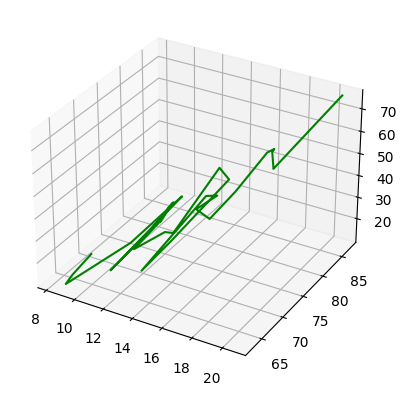

In [11]:
xdat = X[:,0]
ydat = X[:,1]
zdat = y

ax = plt.axes(projection='3d')
ax.plot3D(xdat, ydat, zdat, 'green')

Problem 1.2: Define Loss Function and Perform Gradient
Descent 

In [ ]:
loss = (1/(2*m))*(X*w-y)*(Xw-y)

Problem 1.3: Exploring the Effect of Learning Rate and
feature normalization

In [ ]:
lr_set = [0.3, 0.1,, 0.03, 0.01]

Problem 1.4: Comparing the GD Results with the ClosedForm Solution

# Logistic regression

**Load data**

The data is stored in Google drive, this step mount the google drive and load the data through numpy.

**Note, you need to change the path of the data file based on your case**

In [12]:
from google.colab import drive
drive.mount('/content/drive')
data = np.loadtxt('/content/drive/MyDrive/NUEN 689/Week 2/logisticRegression.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

ModuleNotFoundError: No module named 'google'

**Feature map function for Problem 2.5**

In [ ]:
def map_feature(x1, x2):
    degree = 6

    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x2.size, 1))
    result = np.ones(x1[:, 0].shape)

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            result = np.c_[result, (x1**(i-j)) * (x2**j)]

    return result

**Plot decision boundary**

In [ ]:
def plot_decision_boundary(theta, X, y):
    plt.figure()

    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    plt.scatter(X[pos, 0], X[pos, 1], marker="+", c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker="o", c='y')

    if X.shape[1] <= 3:
        # Only need two points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1/theta[2]) * (theta[1]*plot_x + theta[0])

        plt.plot(plot_x, plot_y)

        plt.legend(['Decision Boundary', 'Admitted', 'Not admitted'], loc=1)
        plt.axis([30, 100, 30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))

        # Evaluate z = theta*x over the grid
        for i in range(0, u.size):
            for j in range(0, v.size):
                z[i, j] = np.dot(map_feature(u[i], v[j]), theta)

        z = z.T

        # Plot z = 0
        # Notice you need to specify the range [0, 0]
        cs = plt.contour(u, v, z, levels=[0], colors='r', label='Decision Boundary')
        plt.legend([cs.collections[0]], ['Decision Boundary'])

**Complete Problems 2.1-2.5, decompose your code into different sessions for clarity.**

Problem 2.1: Visualizing the Data

Problem 2.2: Define Loss Function and Perform Gradient
Descent

Problem 2.3: Comparing with the opt.fmin bfgs Optimizer

In [ ]:
# Invoke plotDecisionBoundary method
plot_decision_boundary(theta=1,X=X,y=y)

Problem 2.4: Plotting the Decision Boundary

Problem 2.5: Feature Mapping and Regularization
